In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [13]:
!cp "gdrive/My Drive/project/preprocess_codes/video_preprocessing_functions.py" .

In [14]:
import os
import pdb
from video_preprocessing_functions import *  # import all needed functions

In [47]:
mypath = "/content/gdrive/My Drive/project/"
agotpath = mypath + "agot_data/"
funspath = mypath + "preprocess_codes/"
list_root = agotpath + 'agot-24/splitfiles/' 
label_path = agotpath + 'agot-24/labels/'
testlist_path = agotpath + 'agot-24/testlist.txt'
gt_path = agotpath + 'groundtruths_agot/'

In [39]:
!find /content/gdrive/My\ Drive/project/agot_data/agot-24/ -name 'Icon' -print -delete  # remove all hidden files
!find /content/gdrive/My\ Drive/project/agot_data/agot-24/ -name '.ipynb_checkpoints' -print -delete  # remove all hidden files

In [45]:
!ls -a /content/gdrive/My\ Drive/project/agot_data/agot-24/

labels	    testlist01.txt  trainlist01.txt
rgb-images  testlist.txt    trainlist.txt


## Building train/test lists



In [6]:
train_ratio = 0.8
N = 24 # only use top N classes with highest number of clips

In [ ]:
cutoff = get_Nclasses_cutoff(label_path, N)
build_clipref_list(label_path, list_root, cutoff)
build_labelref_list(label_path, list_root, cutoff)

Pick up sauce:
total clips: 52
training clips: 41
testing clips: 11
Squirt sauce:
total clips: 31
training clips: 24
testing clips: 7
Pickup cut roll from roll machine:
total clips: 29
training clips: 23
testing clips: 6
Place cut roll into boat:
total clips: 30
training clips: 24
testing clips: 6
Put roll into roll cut machine:
total clips: 30
training clips: 24
testing clips: 6
Pick up from bin with hands:
total clips: 55
training clips: 44
testing clips: 11
Pick up from bin with tong or scooper:
total clips: 149
training clips: 119
testing clips: 30
Put tongs or scooper back in bin:
total clips: 89
training clips: 71
testing clips: 18
Operating sushi roll cutter:
total clips: 28
training clips: 22
testing clips: 6
Pick up a drink:
total clips: 22
training clips: 17
testing clips: 5
Roll a sushi roll:
total clips: 25
training clips: 20
testing clips: 5
Clean counter:
total clips: 36
training clips: 28
testing clips: 8
Put lid on roll:
total clips: 15
training clips: 12
testing clips:

## Create Agot groundtruths folder

In [ ]:
gen_groundtruth_folder(testlist_path, label_path, gt_path)

len of testlist: 22273
processing row 0
processing row 1000
processing row 2000
processing row 3000
processing row 4000
processing row 5000
processing row 6000
processing row 7000
processing row 8000
processing row 9000
processing row 10000
processing row 11000
processing row 12000
processing row 13000
processing row 14000
processing row 15000
processing row 16000
processing row 17000
processing row 18000
processing row 19000
processing row 20000
processing row 21000
processing row 22000


In [ ]:
!zip -r groundtruths_agot.zip /content/gdrive/My\ Drive/project/agot_data/groundtruths_agot

In [ ]:
!cp -r groundtruths_agot.zip /content/gdrive/My\ Drive/project/agot_data/

## Data visualization

In [ ]:
import pandas as pd

In [ ]:
num_clips, labels = get_num_clips(label_path)

In [ ]:
df = pd.DataFrame()
df['labels']  = labels
df['clips'] = num_clips
df = df.sort_values(by=['clips'], ascending=False)
df['id'] = range(1, len(labels)+1)

In [ ]:
df.to_csv(agotpath+"agot_stat.csv", index=False)

### add statistics of frames / clips - upload to github

In [ ]:
df.head()

,labels,clips,id
6,Pick up from bin with tong or scooper,149,1
32,Put item into meal using tongs,136,2
7,Put tongs or scooper back in bin,89,3
29,Operating POS,74,4
33,Put item into meal using hands,66,5


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# print(plt.style.available)

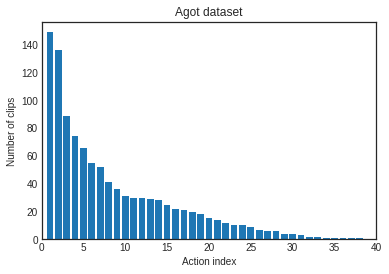

In [ ]:
plt.style.use('seaborn-white')
plt.bar(df['id'], df['clips'], color='tab:blue')
plt.xlabel("Action index")
plt.ylabel("Number of clips")
plt.xlim(0, 40)
plt.savefig(agotpath+'agot_hist.pdf') 

In [ ]:
!zip -r agot24.zip "/content/gdrive/My Drive/project/agot_data/agot-24"

Scanning files ............................................................................. .................
  adding: content/gdrive/My Drive/project/agot_data/agot-24/ (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/ (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/ (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/g_00020_c_00001/ (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/g_00020_c_00001/00001.txt (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/g_00020_c_00001/00002.txt (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/g_00020_c_00001/00003.txt (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot-24/labels/Pick up sauce/g_00020_c_00001/00004.txt (stored 0%)
  adding: content/gdrive/My Drive/project/agot_data/agot

## Custom anchor box

In [48]:
cutoff = get_Nclasses_cutoff(label_path, 5)
bounding_boxes = read_labels(label_path, cutoff)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


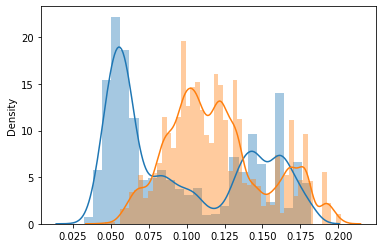

In [50]:
sns.distplot(np.array(bounding_boxes)[:,0])
sns.distplot(np.array(bounding_boxes)[:,1])

In [51]:
K = 9
T = 20
clustering_means = []
clustering_histories = []

In [57]:
cluster_mean = initialize(K)
#clustering_means.append(cluster_mean)

for t in range(T):
    #print('t = ', t)
    cluster = find_clusters(bounding_boxes, cluster_mean, K)
    clustering_histories.append(cluster)
    cluster_mean = new_cluster(bounding_boxes, cluster, cluster_mean, K)
    clustering_means.append(cluster_mean)
clustering_means

In [58]:
for t in range(T):
    num = []
    for k in range(K):
        num.append(sum(clustering_histories[t] == k))
        
    print(num)

[0, 9479, 0, 0, 189, 3186, 0, 9846, 0]
[0, 0, 17066, 0, 0, 0, 0, 4811, 823]
[5445, 0, 4988, 1250, 0, 0, 11017, 0, 0]
[116, 0, 0, 0, 815, 9975, 11794, 0, 0]
[365, 0, 0, 0, 92, 12485, 0, 9758, 0]
[96, 0, 9753, 0, 85, 0, 0, 12728, 38]
[154, 0, 12724, 126, 1388, 0, 8308, 0, 0]
[916, 0, 0, 0, 79, 8459, 13246, 0, 0]
[274, 0, 0, 0, 1251, 13051, 0, 8124, 0]
[0, 0, 8334, 0, 255, 0, 0, 13197, 914]
[643, 0, 13401, 0, 0, 8384, 0, 0, 272]
[560, 0, 0, 0, 0, 13113, 0, 8383, 644]
[0, 0, 0, 0, 644, 8383, 0, 13113, 560]
[311, 328, 0, 0, 560, 13115, 0, 8386, 0]
[0, 1252, 0, 0, 639, 8274, 0, 12535, 0]
[0, 0, 0, 0, 560, 13034, 0, 8468, 638]
[0, 0, 0, 0, 639, 8467, 0, 13025, 569]
[0, 0, 0, 0, 569, 13025, 0, 8467, 639]
[0, 0, 0, 0, 639, 8467, 0, 13025, 569]
[0, 0, 0, 0, 569, 13025, 0, 8467, 639]


In [ ]:
def plot_clustering(clustering, K):
    
    time = len(clustering)
    
    cluster_history = []
    for k in range(K):
        w = []
        h = []
        for i in range(time):
            w.append(clustering[i][k][0])
            h.append(clustering[i][k][1])
            
        cluster_history.append([w,h])
        
    return cluster_history
            

def plot_history(cluster_history, K):
    for k in range(K):
        plt.figure(k)
        plt.plot(cluster_history[k][0] )
        plt.plot( cluster_history[k][1])
        plt.legend(['width', 'height'])
    
    
mean_history = plot_clustering(clustering_means, K)
plot_history(mean_history, K)

In [59]:
def color(k):
    if k == 0:
        return 'b'
    if k == 1:
        return 'r'
    if k == 2:
        return 'g'
    if k == 3:
        return 'm'
    if k == 4:
        return 'y'

In [ ]:
def plot_clusters_random(clustering_means, clustering_histories, bounding_boxes, K):
    
    time = len(clustering_means)
    boxes = len(clustering_histories[0])
    
    for t in range(time):
        print(t)
        plt.figure(t, figsize=(10,5))
        
        for c in range(1000):
            i = random.randint(0, boxes-1)
            plt.plot(bounding_boxes[i][0], bounding_boxes[i][1], color(clustering_histories[t][i]) + '.')
        
        for k in range(K):
            plt.plot(clustering_means[t][k][0], clustering_means[t][k][1], 'kD')
        
    
plot_clusters_random(clustering_means, clustering_histories, bounding_boxes, K)
            

In [ ]:
def plot_clusters(clustering_means, clustering_histories, bounding_boxes, K):
    
    time = len(clustering_means)
    boxes = len(clustering_histories[0])
    
    for t in range(time):
        plt.figure(t, figsize=(10,5))
        for i in range(boxes):
            plt.plot(bounding_boxes[i][0], bounding_boxes[i][1], color(clustering_histories[t][i]) + '.')
            if i == 1000:
                break
        
        for k in range(K):
            plt.plot(clustering_means[t][k][0], clustering_means[t][k][1], 'kD')
        
    
plot_clusters(clustering_means, clustering_histories, bounding_boxes, K)
            

In [29]:
kmeans5 = KMeans(n_clusters=9)
y_kmeans5 = kmeans5.fit_predict(bounding_boxes)
print(y_kmeans5)

kmeans5.cluster_centers_

[1 1 1 ... 1 1 1]


array([[0.13880871, 0.11813891],
       [0.05859694, 0.12502333],
       [0.16955217, 0.17614289],
       [0.05480948, 0.10309278],
       [0.09716216, 0.12562846],
       [0.15394468, 0.13841293],
       [0.14325073, 0.16790051],
       [0.08931931, 0.0823151 ],
       [0.05374269, 0.08098185]])

In [30]:
for k in range(6):
    print('k = ', k, ': ', sum(y_kmeans5 == k))
    

k =  0 :  2379
k =  1 :  3025
k =  2 :  2636
k =  3 :  4839
k =  4 :  1635
k =  5 :  1607


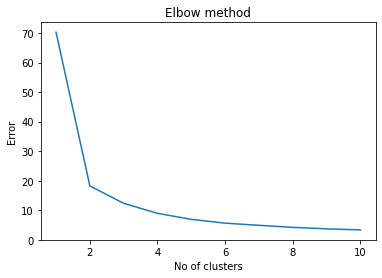

In [31]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(bounding_boxes)
    kmeans.fit(bounding_boxes)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

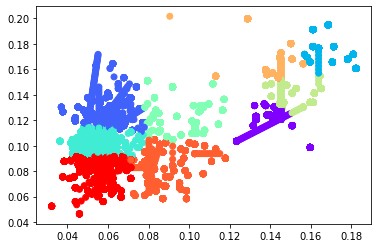

In [32]:
plt.scatter(np.array(bounding_boxes)[:,0], np.array(bounding_boxes)[:,1], c = y_kmeans5, cmap = 'rainbow')

In [60]:
np.array(bounding_boxes).shape

(22700, 2)